In [1]:
import numpy as np
import matplotlib.pyplot as plt
from noise_correlations import discriminability, null_models, plot

In [2]:
angle = np.pi/4
r = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
cov0 = r.dot(np.array([[1., 0.], [0., 3.]])).dot(r.T)
cov1 = cov0

In [19]:
deltas = np.logspace(-1., .5, 5)
n_dtheta = 25
measures = [discriminability.linear_discriminability, discriminability.mv_normal_jeffreys,
            discriminability.lda_samples, discriminability.qda_samples]

results = np.zeros((n_dtheta, n_dtheta, deltas.size, len(measures)))

for ii, theta0 in enumerate(np.linspace(-np.pi/2, np.pi/2, n_dtheta)):
    r0 = np.array([[np.cos(theta0), np.sin(theta0)], [-np.sin(theta0), np.cos(theta0)]])
    cov0p = r0.dot(cov0).dot(r0.T)
    for jj, theta1 in enumerate(np.linspace(-np.pi/2, np.pi/2, n_dtheta)):
        r1 = np.array([[np.cos(theta1), np.sin(theta1)], [-np.sin(theta1), np.cos(theta1)]])
        cov1p = r1.dot(cov1).dot(r1.T)
        for kk, delta in enumerate(deltas):
            mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
            mu1 = -mu0
            mu0 += 1
            mu1 += 1
            for nn, m in enumerate(measures):
                results[ii, jj, kk, nn] = m(mu0, cov0p, mu1, cov1p)
#results -= results.min(axis=(0, 1, 2), keepdims=True)
#results /= results.max(axis=(0, 1, 2), keepdims=True)

In [20]:
resultsp = results.copy()
#resultsp -= resultsp.min(axis=(0, 1, 2), keepdims=True)
resultsp /= resultsp.max(axis=(0, 1, 2), keepdims=True)

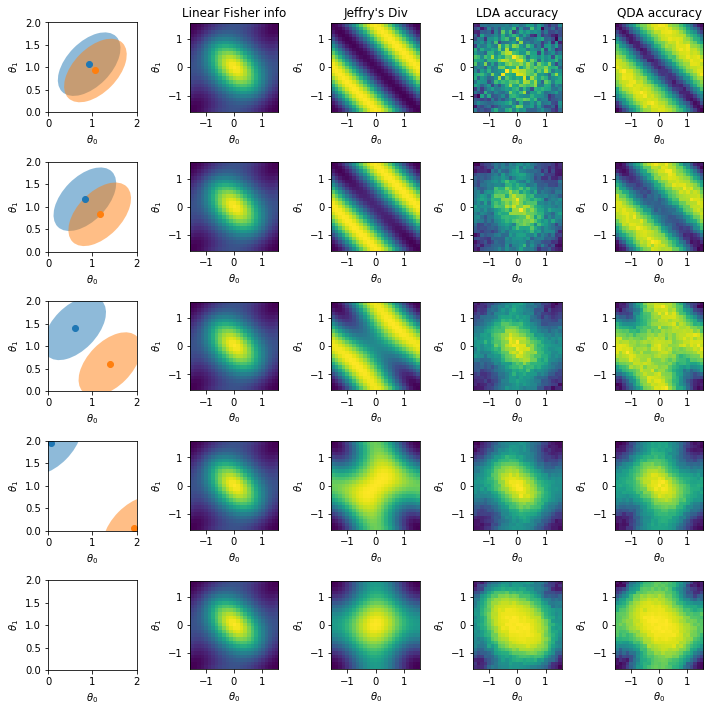

In [41]:
f, axes = plt.subplots(deltas.size, 1+len(measures), figsize = (2*(1+len(measures)), 2*deltas.size))
for ii, delta in enumerate(deltas):
    axr = axes[ii]
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    mu0 += 1
    mu1 += 1
    plot.plot_ellipses(mu0, cov0, mu1, cov1, faxes=(f, axr[0]))
    for jj, ax in enumerate(axr[1:]):
        ax.imshow(results[:, :, ii, jj], extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
for ax in axes[:, 0]:
    ax.set_xlabel('f_0')
    ax.set_ylabel('f_1')
for ax in axes[:, 0:].ravel():
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
axes[0, 1].set_title('Linear Fisher info')
axes[0, 2].set_title('Jeffry\'s Div')
axes[0, 3].set_title('LDA accuracy')
axes[0, 4].set_title('QDA accuracy')
f.tight_layout()
plt.savefig('/home/jesse/Downloads/unnorm.pdf', dpi=300)

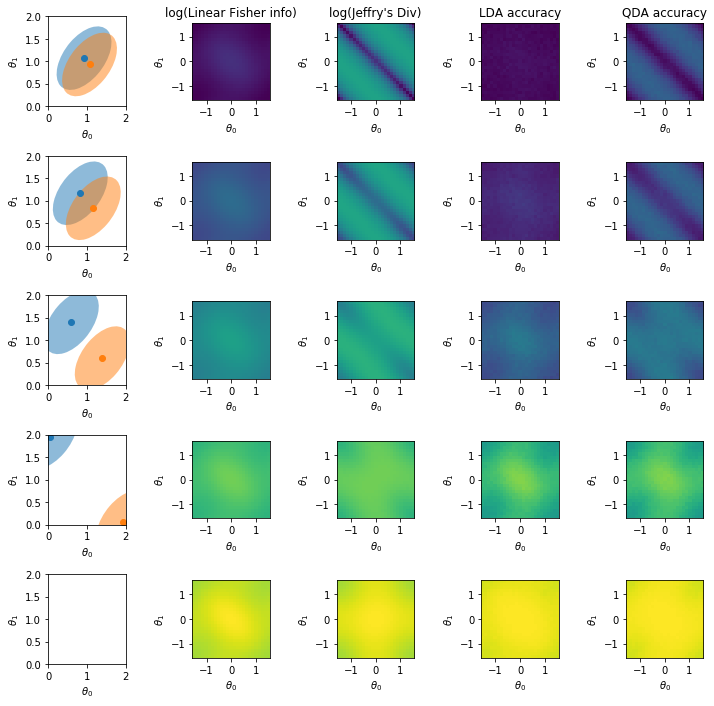

In [40]:
f, axes = plt.subplots(deltas.size, 1+len(measures), figsize = (2*(1+len(measures)), 2*deltas.size))
for ii, delta in enumerate(deltas):
    axr = axes[ii]
    mu0 = delta * np.array([-1., 1]) / np.sqrt(2)
    mu1 = -mu0
    mu0 += 1
    mu1 += 1
    plot.plot_ellipses(mu0, cov0, mu1, cov1, faxes=(f, axr[0]))
    for jj, ax in enumerate(axr[1:]):
        d = resultsp[:, :, ii, jj]
        if jj < 2:
            d = np.log(d)
            ax.imshow(d, vmin=np.log(resultsp[:, :, :, jj]).min(), vmax=0, extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
        else:
            ax.imshow(d, vmin=resultsp[:, :, :, jj].min(), vmax=1, extent=[-np.pi/2, np.pi/2, -np.pi/2, np.pi/2])
for ax in axes[:, 0]:
    ax.set_xlabel('f_0')
    ax.set_ylabel('f_1')
for ax in axes[:, 0:].ravel():
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    
axes[0, 1].set_title('log(Linear Fisher info)')
axes[0, 2].set_title('log(Jeffry\'s Div)')
axes[0, 3].set_title('LDA accuracy')
axes[0, 4].set_title('QDA accuracy')
f.tight_layout()
plt.savefig('/home/jesse/Downloads/norm.pdf', dpi=300)